# **DSL 24-1 기초 과제 1**

### 기수 : 12기
### 이름 : 김은희

In [1]:
# 코랩에서 작성할 경우 아래 주석을 해제해주세요
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


필수 라이버러리 갖고오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import timeit
from scipy import stats

## **2-3**

해당 문제에서는 예시 사진을 이용해서 SVD-Decomposition 이 어떻게 사진을 압축하는데에 사용이 되는지 보여주고 있습니다. 본인이 선정한 사진에 SVD-Decomposition 을 활용해서 Sigma 차원을 $100$ 으로 설정할 경우 용량이 실제로 줄어드는지 확인해보겠습니다.

경로 설정 (image.jpg 경로로 바꿔주세요!)

In [2]:
path_to_image = "C:/Users/eh709/python/DSL_12/basic_hw_1/data/image.jpg"

이미지 출력해서 확인해보기 (**편의상 흑백을 사용할 예정입니다**)

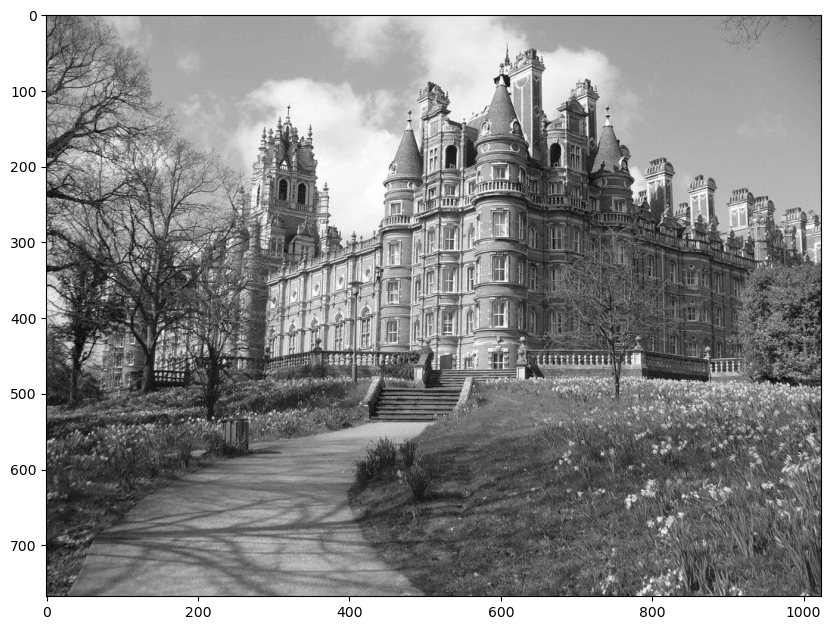

In [3]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 13))
plt.imshow(image, cmap='gray')

다음과 같이 이미지를 Float32 형태의 데이터로 바꾸겠습니다.

In [4]:
image_float = image.astype(np.float32)

그 뒤에 np.linalg.svd 를 활용해서 SVD-Decomposition 을 진행하겠습니다. 여기에서 np.linalg.svd 의 아웃풋은 $U$, 시그마 값, $V^\top$ 가 나오게 되며, 시그마 값을 이용해서 대각선에는 시그마 값들이 있으며 나머지는 $0$ 인 메트릭스를 만들겠습니다.

In [5]:
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)

# 시그마 행렬 확인 용도
print(Sigma_mat.shape)

(768, 1024)


 여기서부터는 해당 이미지에 관해서 고유벡터 $70$ 개만 쓰겠습니다. 즉(나머지 원소들은 $0$ )

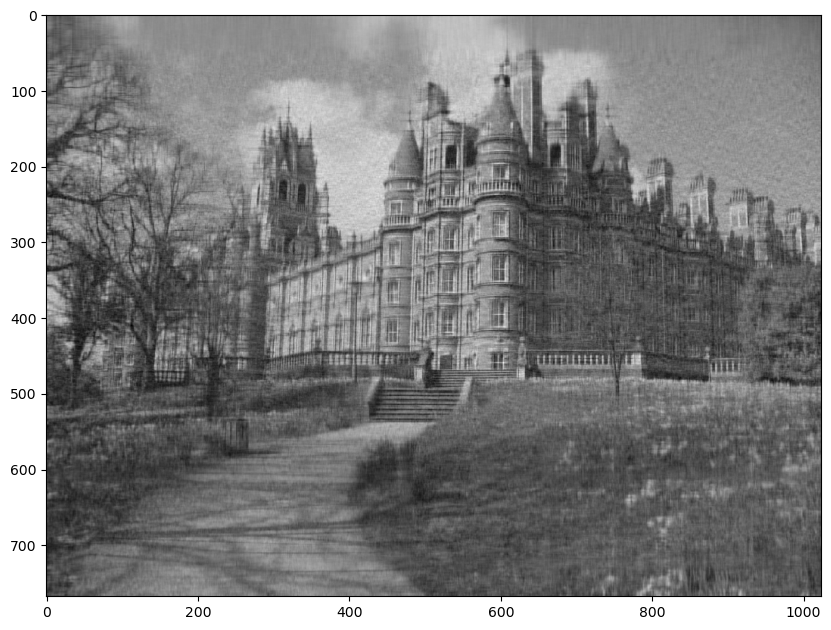

In [6]:
image_composition = np.matmul(U[:, :70], np.matmul(Sigma_mat[:70, :70], Vt[:70, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

전에 비해서 확실히 흐릿해진 모습을 보이고 있습니다. 그렇다면 해당 사진과 이전 사진과 비교해서 어떤 것이 더 많은 용량 (즉 더 많은 Non-Zero 값)을 사용하고 있는지 알아보겠습니다.

In [7]:
def count_nonzero_full_image():
    return np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt)

def count_nonzero_compressed_image():
    return np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :])

full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  1639168  Non-zero Elements
Image Composition uses  125510  Non-zero Elements
Processing Time for 10 Full Images: 5.58969 seconds
Processing Time for 10 Compressed Images: 0.32084 seconds


원본과 확연히 큰 차이를 보이고 있습니다. 그럼에도 원래 이미지가 무엇을 표현하고 싶은지에 대한 정보를 여전히 포함하고 있습니다. 
=> SVD-Decomposition 을 활용하면 더 적은 용량으로 원본의 정보를 살릴 수 있다!

## **문제 2-3**

아래에는 Skeleton Code 가 있습니다. 빈칸에 자기가 원하는 사진과 차원 수를 조정하면서 원본에 비해서 적은 용량을 차지하면서도 원본에 대한 정보를 유지해주세요.

In [8]:
path_to_image = "C:/Users/eh709/python/DSL_12/basic_hw_1/data/snow.jpg"

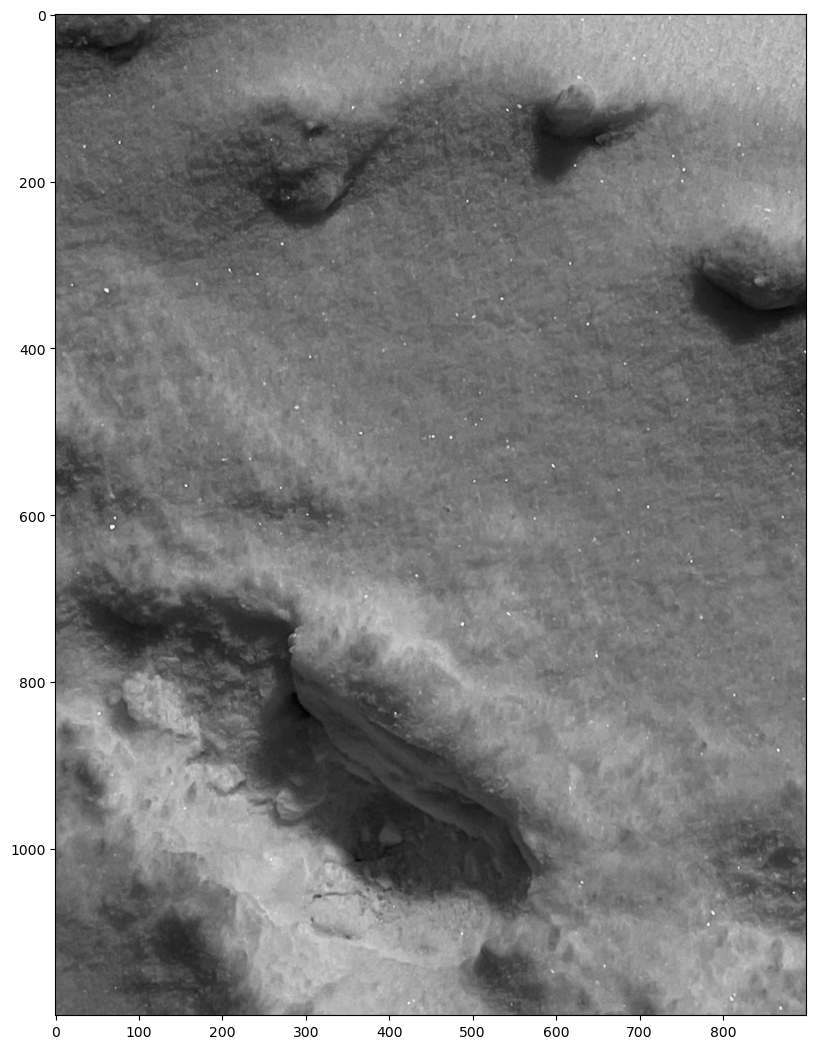

In [9]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 13))
plt.imshow(image, cmap='gray')

In [18]:
image_float = image.astype(np.float32)
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)
print("Image Float's Shape : ", image_float.shape)

Image Float's Shape :  (1200, 900)


시그마 메트릭스 $(\Sigma)$ 차원 설정

In [24]:
num_elements = 50

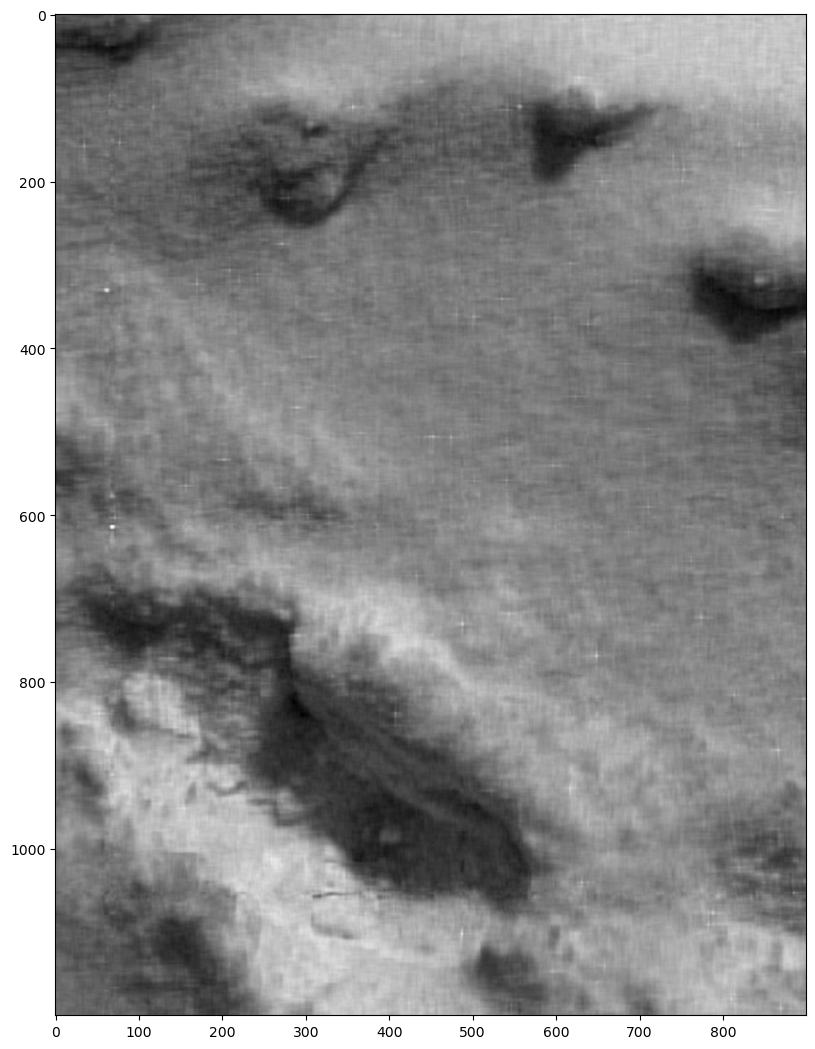

In [25]:
image_composition = np.matmul(U[:, :num_elements], np.matmul(Sigma_mat[:num_elements, :num_elements], Vt[:num_elements, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

In [26]:
full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  2250900  Non-zero Elements
Image Composition uses  147070  Non-zero Elements
Processing Time for 10 Full Images: 7.80869 seconds
Processing Time for 10 Compressed Images: 0.3807 seconds


## **문제 4-2**

파이썬의 scipy.stats 을 활용해서 유의수준 5%에서의 가설검정을 수행하고 결론을 도출하시오.

heights.csv 경로 설정하기

In [27]:
path_to_csv = "C:/Users/eh709/python/DSL_12/basic_hw_1/data/heights.csv"

전처리

In [28]:
data = pd.read_csv(path_to_csv)
DSL = data[data['which'] == 'DSL']
ESC = data[data['which'] == 'ESC']
Else = data[data['which'] == 'Else']

DSL 데이터 형태

In [29]:
DSL.head()

heights which
0    181.8   DSL
1    161.3   DSL
2    177.8   DSL
3    169.1   DSL
4    181.2   DSL

ESC 데이터 형태

In [30]:
ESC.head()

heights which
78    171.1   ESC
79    159.2   ESC
80    184.9   ESC
81    176.1   ESC
82    184.8   ESC

Else 데이터 형태

In [31]:
  Else.head()

heights which
141    180.6  Else
142    169.3  Else
143    176.0  Else
144    180.3  Else
145    177.7  Else

In [33]:
import pandas as pd
from scipy.stats import f_oneway

# ANOVA 테스트 수행
f_statistic, p_value = f_oneway(DSL['heights'], ESC['heights'], Else['heights'])

# 결과 출력
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# 결론 도출
if p_value < 0.05:
    print("유의 수준 5%에서 그룹 간에 유의미한 차이가 있습니다. 따라서 귀무가설을 기각합니다.")
else:
    print("유의 수준 5%에서 그룹 간에 유의미한 차이가 없습니다.")

F-statistic: 6.82185346949053
P-value: 0.0013059664602332191
유의 수준 5%에서 그룹 간에 유의미한 차이가 있습니다. 따라서 귀무가설을 기각합니다.


## **문제 6**

파이썬의 pandas와 numpy 활용과 관련한 몇몇 예제입니다. 주어진 실행 결과와 요구하는 바에 맞게 코드를 작성하시오.

#### 6-A. Pandas

In [34]:
import pandas as pd

path_to_csv = "C:/Users/eh709/python/DSL_12/basic_hw_1/data/train.csv"
data = pd.read_csv(path_to_csv)

In [35]:
data.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

6-1. 사용자의 Name은 여러 ,로 나누어져 있습니다. 첫번째 , 이전의 텍스트를 새로운 filteredName이라는 새로운 변수로 dataframe에 추가해주세요.

In [75]:
# TO-DO

# 1. Name 변수에 대한 전처리
filtered_name = data['Name'].str.split(',').str[0]

# 2. 전처리 한 변수를 다시 dataframe에 추가
data['f_Name'] = filtered_name
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked     f_Name  
0        0         A/5 21171   7.2500   NaN        S     Braund  
1        0          PC 17599  71.2833   C85        C    Cumings  
2        0  STON/O2. 3101282   7.9250   NaN        S  Heikkinen  
3        0            113803  53.1000  C123        S   Futrelle  
4        0            373450   8.0500   NaN        S      Allen  
..     ...               ...      ...   ...      ...        ...  
886      0            211536  13.0000   NaN        S   Montvila  
887      0            112053  30.0000   B42        S     Graham  
888      2        W./C. 6607  23.4500   NaN        S   Johnston  
889      0            111369  30.0000  C148        C       Behr  
890      0            370376   7.7500   NaN        Q     Dooley  

[891 rows x 13 columns]

6-2. 사용자를 PassengerId가 아닌 Age를 기준으로 정렬하여주세요.

In [38]:
# TO-DO

# 정렬
data_sorted = data.sort_values(by='Age')
data_sorted

PassengerId  Survived  Pclass                                      Name  \
803          804         1       3           Thomas, Master. Assad Alexander   
755          756         1       2                 Hamalainen, Master. Viljo   
644          645         1       3                    Baclini, Miss. Eugenie   
469          470         1       3             Baclini, Miss. Helene Barbara   
78            79         1       2             Caldwell, Master. Alden Gates   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  \
803    male  0.42      0      1        2625   8.5167   NaN        C   
755    male  0.67      1      1      250649  14.5000   NaN        S   
644  female  0.75      2      1        2666  19.2583   NaN        C   
469  female  0.75      2      1        2666  19.2583   NaN        C   
78     male  0.83      0      2      248738  29.0000   NaN        S   
..      ...   ...    ...    ...         ...      ...   ...      ...   
859    male   NaN      0      0        2629   7.2292   NaN        C   
863  female   NaN      8      2    CA. 2343  69.5500   NaN        S   
868    male   NaN      0      0      345777   9.5000   NaN        S   
878    male   NaN      0      0      349217   7.8958   NaN        S   
888  female   NaN      1      2  W./C. 6607  23.4500   NaN        S   

      filteredName  
803         Thomas  
755     Hamalainen  
644        Baclini  
469        Baclini  
78        Caldwell  
..             ...  
859           Razi  
863           Sage  
868  van Melkebeke  
878         Laleff  
888       Johnston  

[891 rows x 13 columns]

6-3. 위의 head로 살폈을 때, Cabin 변수에는 결측치 (NaN) 값이 많은 것으로 보여집니다. Cabin 변수의 데이터 종류 (NaN-?개, C95-?개 등)을 확인하여 히스토그램으로 시각화해주세요.

Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64


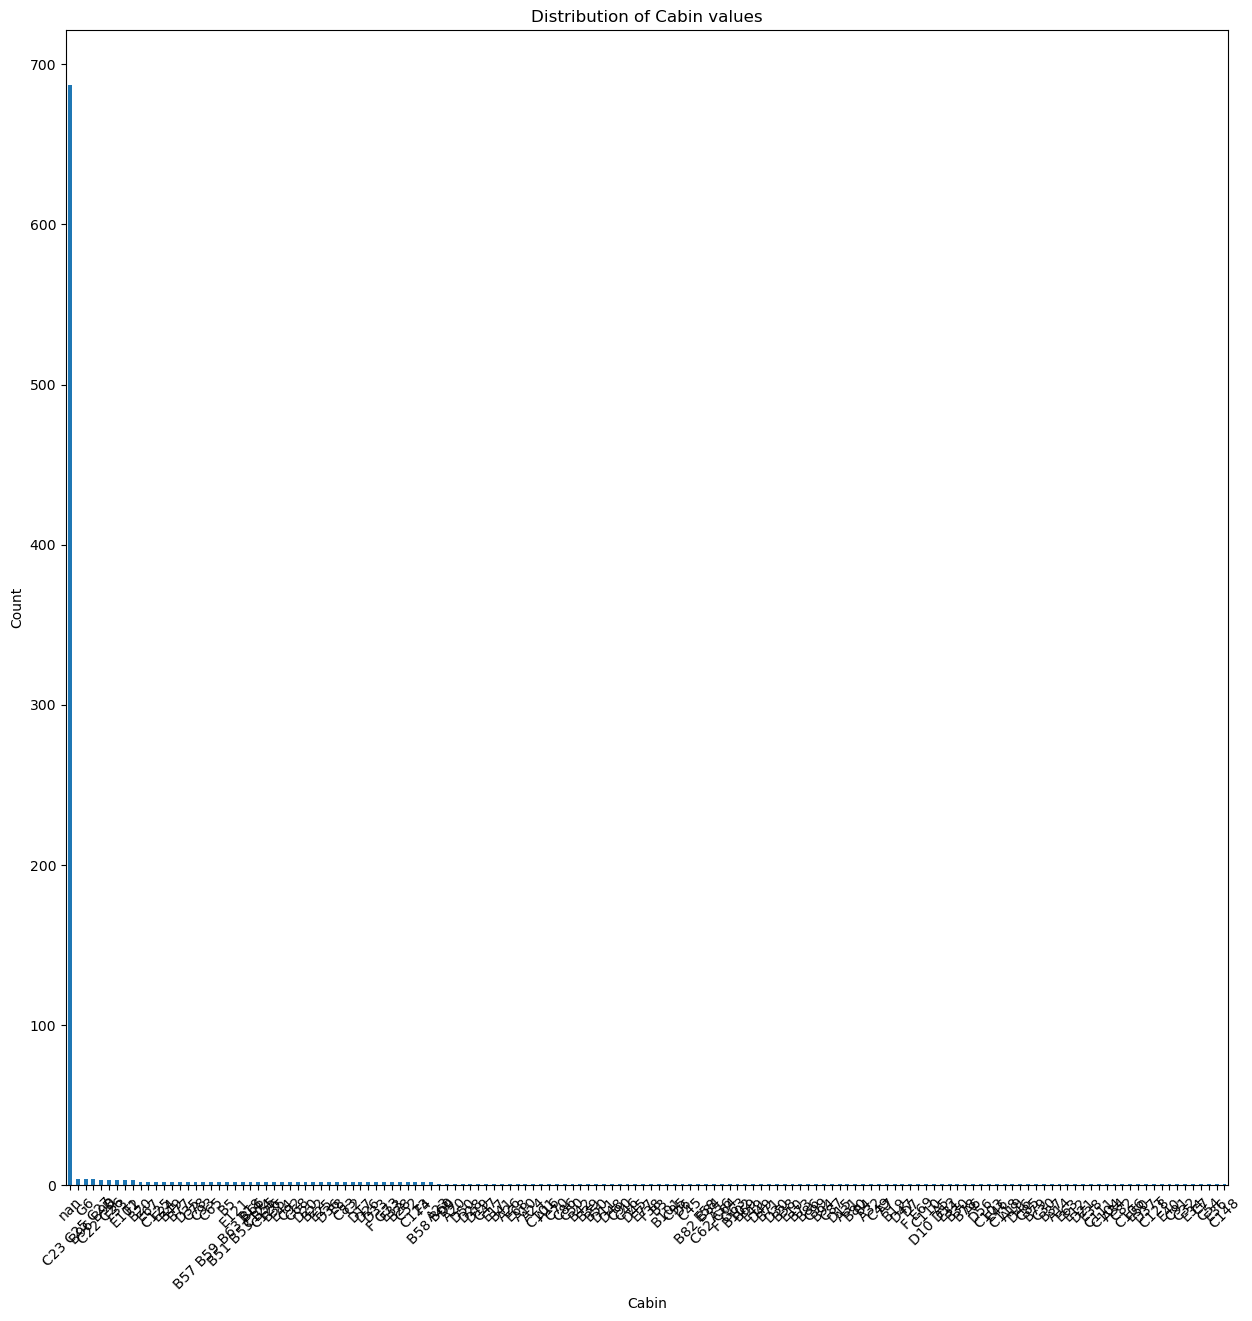

In [55]:
# TO-DO
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cabin 변수의 값 종류 확인
cabin_counts = data['Cabin'].value_counts(dropna=False)
print(cabin_counts)

# 2. 히스토그램 시각화
plt.figure(figsize=(15, 15))
cabin_counts.plot(kind='bar')
plt.title('Distribution of Cabin values')
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

6-4. (Optional) 

Sibsp는 # of siblings / spouses aboard the Titanic, Parch는 # of parents / children abroad the Titanic 입니다. Sibsp 변수와 Parch 중 변수 중 Survived 여부에 영향을 끼치는 하나의 변수를 선택한다면 무엇을 선택할 것이며, 그 이유가 무엇인가요?

In [65]:
# 'Parch'변수를 선택할 것입니다.
# 왜냐하면 siblings / spouses 간에 서로를 지키고자 하는 심리보다 parents가 children을 살리고자 하는 심리가 더 강할 것 같아서

#### 6-B. Numpy

6-5. 아래 lst와 같이 주어진 행렬이 있습니다. 해당 3x3 행렬을 4x2x2 tensor로 변환해주세요. 각각의 2x2 행렬은 좌측 상단 / 좌측 하단 / 우측 상단 / 우측 하단을 뜻합니다.

In [76]:
import numpy as np

lst = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

arr = np.array(lst)

# TO-DO
# 2x2 행렬 생성
top_left = arr[0:2, 0:2]  # 좌_상단
top_right = arr[0:2, 1:3] # 우_상단
bottom_left = arr[1:3, 0:2] # 좌_하단
bottom_right = arr[1:3, 1:3] # 우_하단

# 4x2x2 텐서 스택
tensor = np.array([top_left, top_right, bottom_left, bottom_right])
tensor

array([[[1, 2],
        [4, 5]],

       [[2, 3],
        [5, 6]],

       [[4, 5],
        [7, 8]],

       [[5, 6],
        [8, 9]]])

6-6. Unifrom Distribution으로부터 Sampling한 100개의 점과 Gaussian Distribution으로부터 Sampling한 100개의 점의 분포를 시각화해주세요. 시각화 시 plot에 각 분포의 평균/중앙값을 점선으로 함께 시각화해주세요.

1. uniform distribution은 (0, 1) 범위로, gaussian은 mean이 0, std가 1입니다.
2. 해당 문제에서 사용할 수 있는 라이브러리는 Numpy와 Matplotlib로 제한합니다.

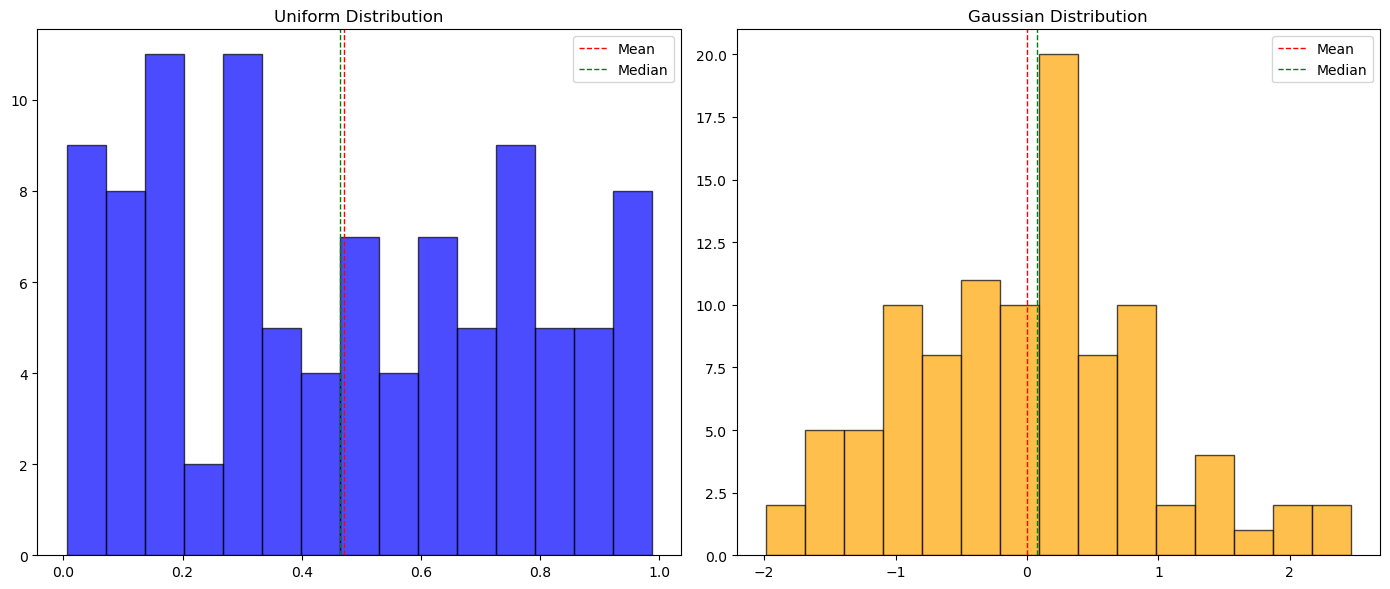

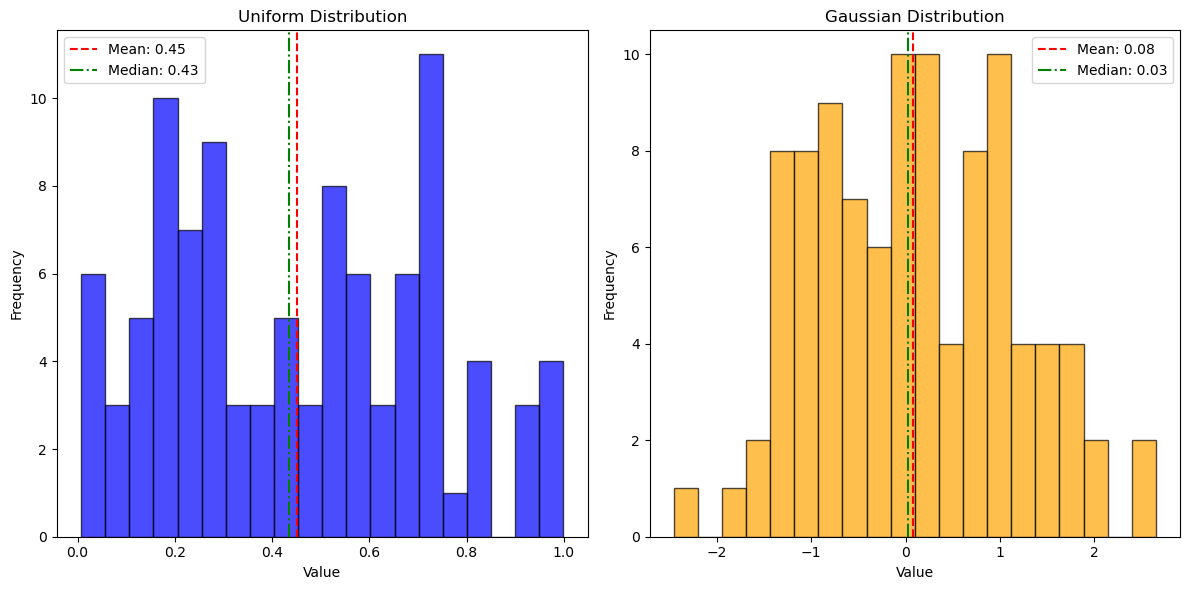

In [78]:
# TO-DO
import numpy as np
import matplotlib.pyplot as plt

# 1. Uniform Distribution으로부터 100개의 점 Sampling
uni_samples = np.random.uniform(0, 1, 100)

# 2. Gaussian Distribution으로부터 100개의 점 Sampling
gau_samples = np.random.normal(0, 1, 100)

# 평균,중앙값 계산
mean_uniform = np.mean(uni_samples)
median_uniform = np.median(uni_samples)

mean_gaussian = np.mean(gau_samples)
median_gaussian = np.median(gau_samples)

# 3. 시각화
plt.figure(figsize=(12, 6))

# 4. 평균/중앙값 점선으로 시각화
# Uniform Distribution 시각화
plt.subplot(1, 2, 1)
plt.hist(uni_samples, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(mean_uniform, color='red', linestyle='--', label=f'Mean: {mean_uniform:.2f}')
plt.axvline(median_uniform, color='green', linestyle='-.', label=f'Median: {median_uniform:.2f}')
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Gaussian Distribution 시각화
plt.subplot(1, 2, 2)
plt.hist(gau_samples, bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.axvline(mean_gaussian, color='red', linestyle='--', label=f'Mean: {mean_gaussian:.2f}')
plt.axvline(median_gaussian, color='green', linestyle='-.', label=f'Median: {median_gaussian:.2f}')
plt.title('Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()